### Object Detection Proje Sonu Ödevi

## Araba Plakası Tanıma Projesi

Merhaba arkadaşlar bu bolüm sonu ödevimizde bir object detection projesi geliştirmenizi istiyorum.! Amacımız HaarCascades metodunu kullanarak bir plaka tanıma sistemi geliştirmek olucak.Aşağıdaki görevleri izleyerek ekranda görmüş olduğunuz çıktıyı elde etmeye çalışınız.

**GÖREV: Gerekli kütüphaneleri içeri aktarınız.**

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

**GÖREV: Data klasörünün içerisindeki car_plate.jpg isimli fotoğrafı okuyunuz.**

In [2]:
img = cv2.imread('Data/car_plate.jpg')

**GÖREV: Bir adet display isimli bir fonksiyon oluşuturun ve bu fonksiyonun içerisinde fotoğrafın ölçeklenmesi ve BGR-RGB dönüşümünü gerçekleştiriniz.**

In [3]:
def display(img):
    # Burayı doldurunuz!
    fig = plt.figure(figsize=(10,8))
    ax = fig.add_subplot(111)
    new_img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    ax.imshow(new_img)

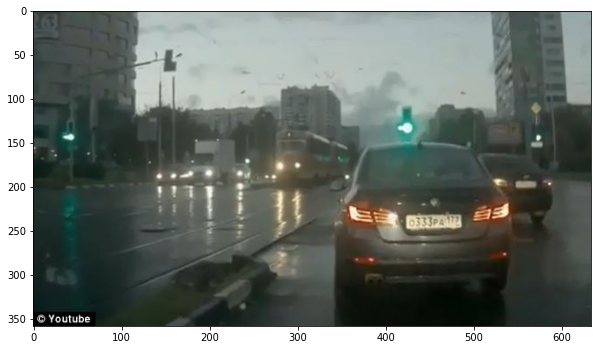

In [4]:
display(img)

**GÖREV: haarcascade_russian_plate_number.xml isimli HaarCascade xml dosyasını yükleyiniz.**

In [10]:
plate_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_russian_plate_number.xml')

**GÖREV: Bir adet detect_plate isimli bir fonksiyon oluşturunuz. Bu fonksiyonun görevi parametre olarak gönderdiğiniz fotoğraf dosyasının bir kopyasını oluşturmak ve bu kopya üzerinde belirleyeceğiniz plakaların çevresine kırmızı renginde dikdörtgen boundingbox çizim işlemini gerçekleştirmek olucak.**

In [11]:
def detect_plate(img):
    
    plate_img = img.copy()
    
    plate_rects = plate_cascade.detectMultiScale(plate_img,scaleFactor=1.3,minNeighbors=3)
    
    for (x,y,w,h) in plate_rects:
        cv2.rectangle(plate_img,(x,y),(x+w,y+h),(0,0,255),4)
    return plate_img

In [12]:
result = detect_plate(img)

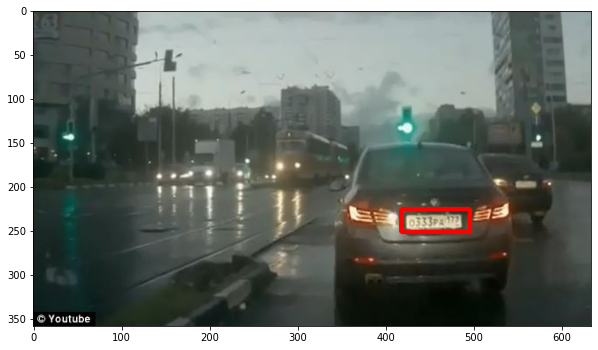

In [13]:
display(result)

**FINAL GÖREV: Bu görevimizde farklı bir fonksiyon oluşturarak bu foksiyona dikdörtgen çizdirme işlemi yanı sıra belirlediğiniz plakaya blur işlemi gerçekleştiriniz.**

In [17]:
def detect_and_blur_plate(img):
    
    plate_img = img.copy()
    roi = img.copy()
    
    plate_rects = plate_cascade.detectMultiScale(plate_img,scaleFactor=1.3,minNeighbors=3)
    
    for (x,y,w,h) in plate_rects:
        
        roi = roi[y:y+h,x:x+w]
        blurred_roi = cv2.medianBlur(roi,7)
        
        plate_img[y:y+h,x:x+w] = blurred_roi
        
    return plate_img
    

In [18]:
result = detect_and_blur_plate(img)

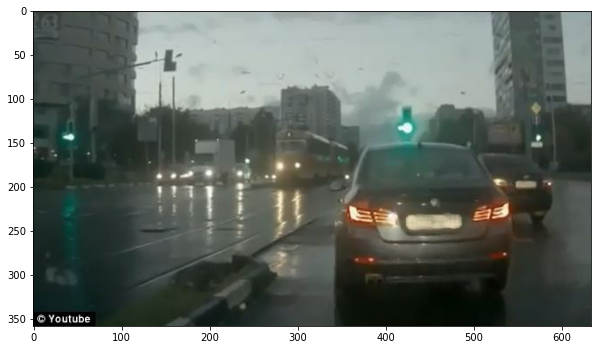

In [19]:
display(result)

# BÖLÜM SONU TEBRİKLER !